<a href="https://colab.research.google.com/github/AnastasiiaPashkevych/extracting-stock-data-using-a-python-library/blob/main/extracting_stock_data_using_a_python_library.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance
!pip install matplotlib
# !pip install pandas==1.3.3

In [ ]:
import yfinance as yf
import pandas as pd

In [ ]:
# Using the Ticker module we can create an object that will allow us to access functions to extract data.
# To do this we need to provide the ticker symbol for the stock, here the company is Apple and the ticker symbol is AAPL
apple = yf.Ticker("AAPL")

In [ ]:
# Now we can access functions and variables to extract the type of data we need.
# You can view them and what they represent here https://aroussi.com/post/python-yahoo-finance.
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/apple.json

--2025-03-08 17:00:54--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/apple.json
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5699 (5.6K) [application/json]
Saving to: ‘apple.json’

apple.json          100%[===================>]   5.57K  --.-KB/s    in 0s      

2025-03-08 17:00:54 (1.23 GB/s) - ‘apple.json’ saved [5699/5699]



In [ ]:
# Using the attribute info we can extract information about the stock as a Python dictionary.
import json
with open('apple.json') as json_file:
    apple_info = json.load(json_file)
    # Print the type of data variable
    #print("Type:", type(apple_info))
apple_info

{'zip': '95014',
 'sector': 'Technology',
 'fullTimeEmployees': 100000,
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. It also sells various related services. In addition, the company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; AirPods Max, an over-ear wireless headphone; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, HomePod, and iPod touch. Further, it provides AppleCare support services; cloud services store services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. Additionally, the company offers various services, such as Apple Arcade, a game subscription service; Apple Music, which offers users a curated listening experience wit

In [ ]:
# We can get the 'country' using the key country
apple_info['country']

'United States'

In [ ]:
# A share is the single smallest part of a company's stock that you can buy, the prices of these shares fluctuate over time.
# Using the history() method we can get the share price of the stock over a certain period of time.
# Using the period parameter we can set how far back from the present to get data.
# The options for period are 1 day (1d), 5d, 1 month (1mo) , 3mo, 6mo, 1 year (1y), 2y, 5y, 10y, ytd, and max.
apple_share_price_data = apple.history(period="max")
apple_share_price_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.098726,0.099155,0.098726,0.098726,469033600,0.0,0.0
1980-12-15 00:00:00-05:00,0.094005,0.094005,0.093575,0.093575,175884800,0.0,0.0
1980-12-16 00:00:00-05:00,0.087136,0.087136,0.086707,0.086707,105728000,0.0,0.0
1980-12-17 00:00:00-05:00,0.088853,0.089282,0.088853,0.088853,86441600,0.0,0.0
1980-12-18 00:00:00-05:00,0.091429,0.091859,0.091429,0.091429,73449600,0.0,0.0


In [ ]:
# We can reset the index of the DataFrame with the reset_index function.
# We also set the inplace paramter to True so the change takes place to the DataFrame itself.
apple_share_price_data.reset_index(inplace=True)

<Axes: xlabel='Date'>

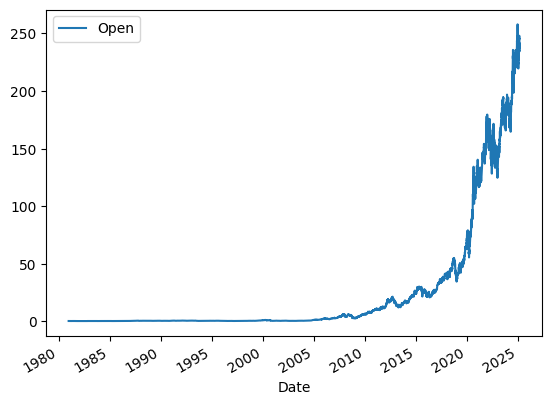

In [ ]:
# We can plot the Open price against the Date:
apple_share_price_data.plot(x="Date", y="Open")

In [ ]:
# Dividends are the distribution of a companys profits to shareholders.
# In this case they are defined as an amount of money returned per share an investor owns.
# Using the variable dividends we can get a dataframe of the data.
# The period of the data is given by the period defined in the 'history` function.
apple.dividends

,Dividends
Date,
1987-05-11 00:00:00-04:00,0.000536
1987-08-10 00:00:00-04:00,0.000536
1987-11-17 00:00:00-05:00,0.000714
1988-02-12 00:00:00-05:00,0.000714
1988-05-16 00:00:00-04:00,0.000714
...,...
2024-02-09 00:00:00-05:00,0.240000
2024-05-10 00:00:00-04:00,0.250000
2024-08-12 00:00:00-04:00,0.250000


<Axes: xlabel='Date'>

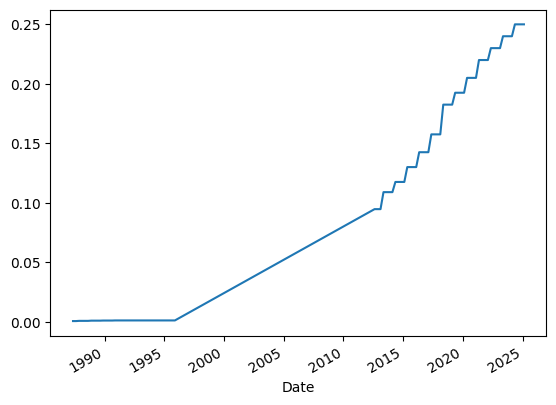

In [ ]:
# We can plot the dividends overtime:
apple.dividends.plot()